In [45]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib.pyplot import subplots
import matplotlib.pyplot as plt  
import sklearn.model_selection as skm
from sklearn.metrics import (accuracy_score,
                             log_loss)
from sklearn.cluster import DBSCAN


In [114]:
#load the datasets into a pandas DataFrame
df = pd.read_stata('school_intervention_panel_final.dta', convert_categoricals=False)

/tmp/ipykernel_53/4246522230.py:2: UnicodeWarning: 
One or more strings in the dta file could not be decoded using utf-8, and
so the fallback encoding of latin-1 is being used.  This can happen when a file
has been incorrectly encoded by Stata or some other software. You should verify
the string values returned are correct.
  df = pd.read_stata('school_intervention_panel_final.dta', convert_categoricals=False)


In [115]:
df = df.rename(columns={
    'female' : 'Student is female (Baseline)',
    'miss_f_coded' : 'Student gender could not be coded based on name (Baseline)',
    'dumm_rp_08_bl' : 'Education of mother: At least some secondary (Baseline)',
    'dumm_rp_09_bl' : 'Education of father: At least some secondary (Baseline)',
    'dumm_rp_14_bl' : 'Student\'s Family receives Bolsa Familia cash transfer (Baseline)',
    'dumm_rp_23_bl' : 'Student has computer with internet at home (Baseline)',
    'dumm_rp_24_bl' : 'Student has failed at least one school year (Baseline)',
    'dumm_rp_49_bl' : 'Student is not working at the moment (Baseline)',
    'business_bl' : 'Student works in own or family business (Baseline)',
    'employee_bl' : 'Student works as employee or other (Baseline)',
    'dumm_rp_50_bl' : 'Student receives income (Baseline)',
    'dumm_rp_53B_bl' : 'Student part of income saved is non-zero (Baseline)',
    'dumm_rp_55_bl' : 'Student has borrowed money (any source) (Baseline)',
    'dumm_rp_56_bl' : 'Student is behind on payments (unconditional) (Baseline)',
    'dumm_rp_57s_bl' : 'Student is behind on payments to store (Baseline)',
    'dumm_rp_57i_bl' : 'Student is behind on payments to family friends or other people (Baseline)',
    'dumm_rp_57f_bl' : 'Student is behind on payments to bank or FI (Baseline)',
    'dumm_rp_59_bl' : 'Student says they are a saver (Baseline)',
    'dumm_rp_61_bl' : 'Student has formal savings (Baseline)',
    'dumm_rp_64A_bl' : 'Student makes a list of all monthly expenses (Baseline)',
    'dumm_rp_65A_bl': 'Student saves money for future purchases (Baseline)',
    'dumm_rp88__92C_bl': 'Student has bought electronics shoes or clothing with credit card (Baseline)',
    'dumm_rp88__92D_bl': 'Student has bought electronics shoes or clothing on installments (Baseline)',
    'dumm_rp88__92AB_bl': 'Student has bought electronics shoes or clothing with cash/debit card (Baseline)',
    'dumm_negotiates_bl': 'Student negotiates prices or payment methods (Baseline)',
    'dumm_search_bl': 'Student comparison shops before making purchase (Baseline)',
    'dumm_rp_08p_bl': 'Parent has at least some secondary education (Baseline)',
    'p_employee_bl': 'Parent is an employee (Baseline)',
    'p_selfempl_bl': 'Parent is self-employeed (Baseline)',
    'p_other_bl': 'Parent occupation is other (homemaker, retired, unemployed, other) (Baseline)',
    'dumm_rp_14p_bl': 'Parent: makes a list of all monthly expenses (Baseline)',
    'dumm_rp_18p_bl': 'Parent: has checking account (Baseline)',
    'dumm_rp_18p_bl': 'Parent: has savings account (Baseline)',
    'dumm_rp_19p_bl': 'Parent: has debit card (Baseline)',
    'dumm_rp_23p_bl': 'Parent: has checks (Baseline)',
    'dumm_formal_saving_bl':' Parent: has formal savings (Baseline)',
    'dumm_rp_33p_bl': 'Parent: Student talks to you about finances (Baseline)',
    'dumm_rp_34p_bl': 'Parent: Student helps organize HH budget (Baseline)',
    'dumm_rp_36p_bl': 'Parent: Prefers R50K plus 15 percent interest (Baseline)',
    'dumm_rp_37p_bl': 'Parent: Inflation question dummy for correct (Baseline)',
    'vl_proficiencia_bl': 'Student: Finanical Proficieny Score (Baseline)', 
    'dumm_rp_49_fup' : "Student is not working at the moment" ,  
    'business_fup' : 'Student works in own or family busines' ,
    'employee_fup' : 'Student works as employee or other', 
    'dumm_rp_50_fup': 'Student: Receives income' ,
     'dumm_rp_53B_fup': 'Student: Pct of income saved is non-zero', 
    'dumm_rp_55_fup': 'Student: Has borrowed money (any source)',
    'dumm_rp_56_fup' : 'Student: Is behind on payments (unconditional)',
    'dumm_rp_57f_fup' : 'Student: Is behind on payments to bank or FI' ,
    'dumm_rp_57s_fup' : 'Student: Is behind on payments to store',
    'dumm_rp_57i_fup': 'Student: Is behind on payments to family friends or other people', 
    'dumm_rp_59_fup' : 'Student: Says they are a saver' , 
    'dumm_rp_61_fup' : 'Student: Has formal savings', 
    'dumm_rp_64A_fup' : 'I make a list of all monthly expenses', 
    'dumm_rp_65A_fup' : 'Student: Saves money for future purchases',
    'dumm_rp_88C_fup': 'Student: I have bought cell phone with credit card', 
    'dumm_rp_88D_fup': 'Student: I have bought cell phone on installments',
    'dumm_rp_88AB_fup': 'Student: I have bought a cell phone with cash/debit card',
    'dumm_rp_89C_fup': 'Student: I have bought computer with credit card' ,
    'dumm_rp_89D_fup': 'Student: I have bought computer on installments' ,
    'dumm_rp_89AB_fup': 'Student: I have bought a computer with cash/debit card' ,
    'dumm_rp_90C_fup': 'Student: I have bought an electronic device with credit card' ,
    'dumm_rp_90D_fup': 'Student: I have bought an electronic device on installments' ,
    'dumm_rp_90AB_fup': 'Student: I have bought an electronic device with cash/debit card' ,
    'dumm_rp_91C_fup': 'Student: I have bought shoes with credit card' ,
    'dumm_rp_91D_fup': 'Student: I have bought shoes on installments' ,
    'dumm_rp_91AB_fup': 'Student: I have bought shoes with cash/debit card',
    'dumm_rp_92C_fup': 'Student: I have bought clothing with credit card', 
    'dumm_rp_92D_fup': 'Student: I have bought clothing on installments' ,
    'dumm_rp_92AB_fup' : 'Student: I have bought clothing with cash/debit card',
    'dumm_rp88__92C_fup': 'I have bought electronics shoes or clothing with credit card',
    'dumm_rp88__92D_fup': 'I have bought electronics shoes or clothing on installments' ,
    'dumm_rp88__92AB_fup': 'I have bought electronics shoes or clothing with cash/debit card' ,
    'dumm_rp_93_fup': 'I negotiate the price' ,
    'dumm_rp_94_fup': 'Student I search price in different stores',
    'dumm_rp_95_fup': 'Student I negotiate the payment method' ,
    'dumm_rp_96_fup': 'Student: I search similar models/brands' ,
    'dumm_negotiates_fup': 'Student Negotiates prices or payment methods' ,
    'dumm_search_fup': 'Student Comparison shops before making purchase' ,
    'dumm_rp_08p_fup': 'Parent has at least some secondary education' ,
    'p_employee_fup': 'Parent is an employee' ,
    'p_selfempl_fup': 'Student Parent is self-employeed',
    'p_other_fup': 'Student Parent\'s occupation is other (homemaker, retired, unemployed, other)',
    'dumm_rp_14p_fup': 'Parent: makes a list of all monthly expenses',
    'dumm_rp_18p_fup' : 'Parent: has checking account', 
    'dumm_rp_19p_fup': 'Parent: savings account', 
    'dumm_rp_21p_fup': 'Parent has debit card' ,
    'dumm_rp_23p_fup': 'Parent has checks' ,
    'dumm_formal_saving_fup': 'Parent has formal savings',
    'dumm_rp_33p_fup': 'Parent: Student talks to you about finances' ,
    'dumm_rp_34p_fup': 'Parent: student helps organize HH budget',
    'dumm_rp_36p_fup' : 'Parent: prefers R50K plus 15 percent interest (follow up)',
    'dumm_rp_37p_fup' : 'Parent: Inflation question dummy for correct  (follow up)', 
    'dumm_rp_41p_fup' : 'Parent: budget must have income and expenses (follow up)',

})
column_names = df.columns.tolist()
print(column_names)

['id_geral', 'cd_escola', 'nm_uf_bl', 'matriculas', 'docentes', 'abandonona1sriemdio', 'aprovaona1sriemdio', 'treatment', 'pair_all', 'treatment_workshop', 'strata', 'round', 'female_coded', 'rp_01_bl', 'rp_08_bl', 'rp_09_bl', 'rp_14_bl', 'rp_23_bl', 'rp_24_bl', 'Student: Finanical Proficieny Score (Baseline)', 'bl_test', 'rp_49_bl', 'rp_50_bl', 'rp_53_bl', 'rp_55_bl', 'rp_56_bl', 'rp_57_bl', 'rp_59_bl', 'rp_61_bl', 'rp_64_bl', 'rp_65_bl', 'rp_88_bl', 'rp_89_bl', 'rp_90_bl', 'rp_91_bl', 'rp_92_bl', 'rp_93_bl', 'rp_94_bl', 'rp_95_bl', 'rp_96_bl', 'bl_aluno', 'rp_08p_bl', 'rp_09p_bl', 'rp_14p_bl', 'rp_18p_bl', 'rp_19p_bl', 'rp_21p_bl', 'rp_23p_bl', 'rp_33p_bl', 'rp_34p_bl', 'rp_36p_bl', 'rp_37p_bl', 'vl_proficiencia_fup', 'fu1_test', 'rp_55_fup', 'rp_57_fup', 'rp_49_fup', 'rp_50_fup', 'rp_53_fup', 'rp_56_fup', 'rp_59_fup', 'rp_61_fup', 'rp_64_fup', 'rp_65_fup', 'rp_88_fup', 'rp_89_fup', 'rp_90_fup', 'rp_91_fup', 'rp_92_fup', 'rp_93_fup', 'rp_94_fup', 'rp_95_fup', 'rp_96_fup', 'fu1_aluno'

In [116]:
#useful subdata sets 
follow_up_1_df = df[df['round'] == 0]

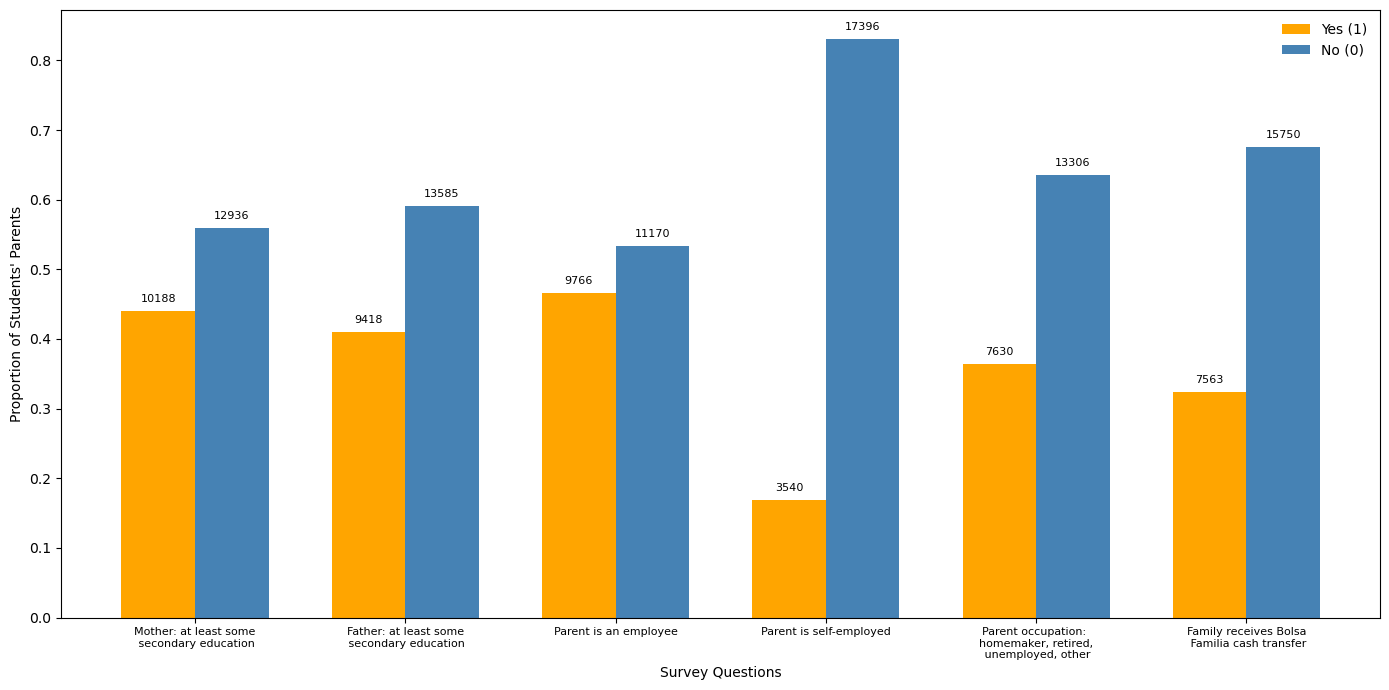

In [120]:
# grouped bar chart for parent characteristics 
parent_char = follow_up_1_df[['Education of mother: At least some secondary (Baseline)', 
'Education of father: At least some secondary (Baseline)', 
'Parent is an employee (Baseline)', 
'Parent is self-employeed (Baseline)', 
'Parent occupation is other (homemaker, retired, unemployed, other) (Baseline)', 
"Student's Family receives Bolsa Familia cash transfer (Baseline)"]]
df = pd.DataFrame(parent_char)

rename_dict = {
    'Education of mother: At least some secondary (Baseline)': 'Mother: at least some\n secondary education',
    'Education of father: At least some secondary (Baseline)': 'Father: at least some\n secondary education',
    'Parent is an employee (Baseline)': 'Parent is an employee',
    'Parent is self-employeed (Baseline)': 'Parent is self-employed',
    'Parent occupation is other (homemaker, retired, unemployed, other) (Baseline)': 'Parent occupation: \nhomemaker, retired,\n unemployed, other',
    'Student\'s Family receives Bolsa Familia cash transfer (Baseline)': 'Family receives Bolsa\n Familia cash transfer'
}

df = df.rename(columns=rename_dict)

# Calculate proportions for each binary variable
proportions = pd.DataFrame({
    var: df[var].value_counts(normalize=True)
    for var in df.columns
}).fillna(0)

# Sort the index to have 0 and 1 in order
proportions = proportions.T[[0, 1]]

# Calculate the counts of 0s and 1s for each column in `parent_char`
counts = df.apply(pd.Series.value_counts).fillna(0).T

# Create the x-axis labels and positions
x = np.arange(len(counts.index))
width = 0.35  # Width of the bars

# Plot the grouped bar chart
fig, ax = plt.subplots(figsize=(14, 7))
bars1 = ax.bar(x - width/2, proportions[1], width, color='orange', label='Yes (1)')
bars2 = ax.bar(x + width/2, proportions[0], width, color='steelblue', label='No (0)')

# Annotate each bar with the number of observations
for i, col in enumerate(counts.index):
    ax.text(x[i] - width/2, proportions[1][col] + 0.01, f"{int(counts.loc[col, 1])}",
            ha='center', va='bottom', fontsize=8, color='black')
    ax.text(x[i] + width/2, proportions[0][col] + 0.01, f"{int(counts.loc[col, 0])}",
            ha='center', va='bottom', fontsize=8, color='black')

# Add labels, title, and legend
ax.set_xlabel('Survey Questions', fontsize=10)
ax.set_ylabel('Proportion of Students\' Parents', fontsize=10)
#ax.set_title('Characteristics of Student Families (Baseline Survey)', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(df.columns, rotation=0, ha='center', fontsize=8)
ax.legend(frameon=False)

plt.tight_layout()
plt.savefig('Characteristics of Student Families.png', dpi=300, bbox_inches='tight')


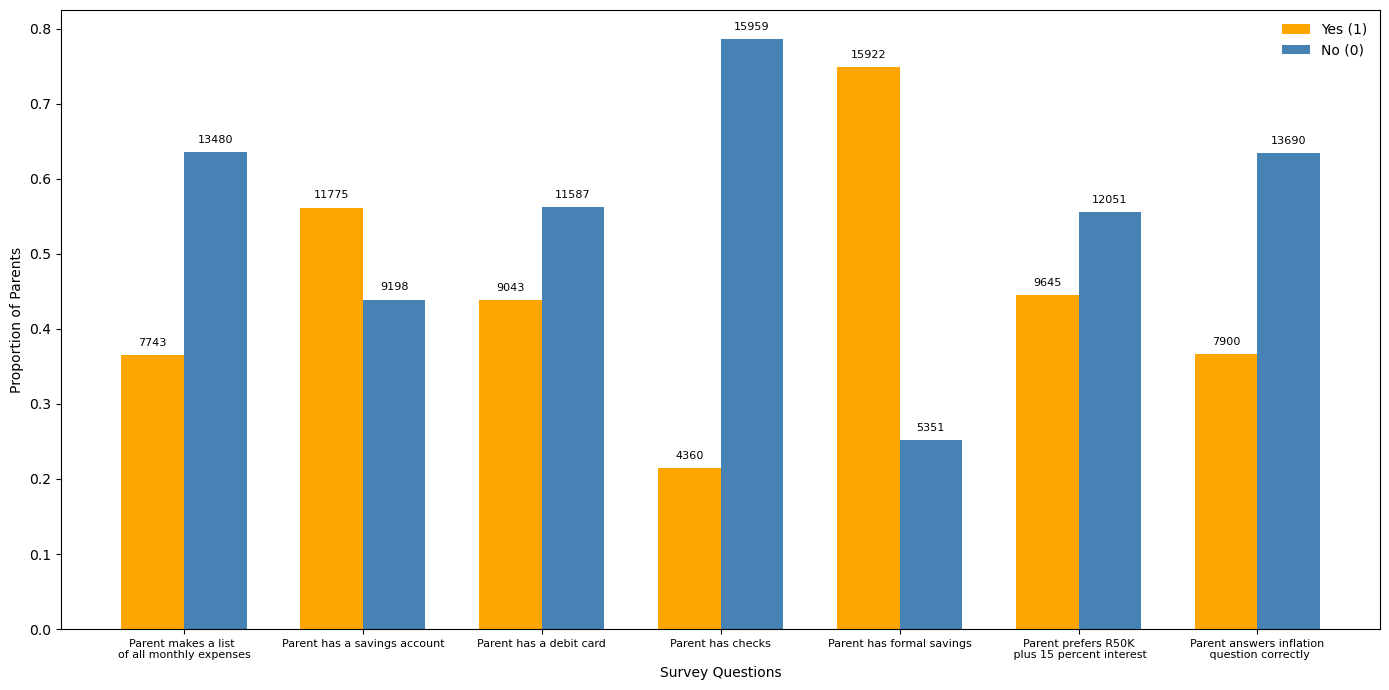

In [123]:
# grouped bar chart for parent financial characteristics 
parent_char = follow_up_1_df[['Parent: makes a list of all monthly expenses (Baseline)', 
'Parent: has savings account (Baseline)',
'Parent: has debit card (Baseline)', 
'Parent: has checks (Baseline)', 
' Parent: has formal savings (Baseline)', 
'Parent: Prefers R50K plus 15 percent interest (Baseline)', 
'Parent: Inflation question dummy for correct (Baseline)', ]]

df = pd.DataFrame(parent_char)

rename_dict = {
    'Parent: makes a list of all monthly expenses (Baseline)': 'Parent makes a list \nof all monthly expenses',
    'Parent: has savings account (Baseline)': 'Parent has a savings account',
    'Parent: has debit card (Baseline)': 'Parent has a debit card',
    ' Parent: has formal savings (Baseline)': 'Parent has formal savings',
    'Parent: has checks (Baseline)':'Parent has checks',
    'Parent: Prefers R50K plus 15 percent interest (Baseline)':'Parent prefers R50K\n plus 15 percent interest',
    'Parent: Inflation question dummy for correct (Baseline)':'Parent answers inflation\n question correctly'
}

df = df.rename(columns=rename_dict)

# Calculate proportions for each binary variable
proportions = pd.DataFrame({
    var: df[var].value_counts(normalize=True)
    for var in df.columns
}).fillna(0)

# Sort the index to have 0 and 1 in order
proportions = proportions.T[[0, 1]]

# Calculate the counts of 0s and 1s for each column in `parent_char`
counts = df.apply(pd.Series.value_counts).fillna(0).T

# Create the x-axis labels and positions
x = np.arange(len(counts.index))
width = 0.35  # Width of the bars

# Plot the grouped bar chart
fig, ax = plt.subplots(figsize=(14, 7))
bars1 = ax.bar(x - width/2, proportions[1], width, color='orange', label='Yes (1)')
bars2 = ax.bar(x + width/2, proportions[0], width, color='steelblue', label='No (0)')

# Annotate each bar with the number of observations
for i, col in enumerate(counts.index):
    ax.text(x[i] - width/2, proportions[1][col] + 0.01, f"{int(counts.loc[col, 1])}",
            ha='center', va='bottom', fontsize=8, color='black')
    ax.text(x[i] + width/2, proportions[0][col] + 0.01, f"{int(counts.loc[col, 0])}",
            ha='center', va='bottom', fontsize=8, color='black')

# Add labels, title, and legend
ax.set_xlabel('Survey Questions', fontsize=10)
ax.set_ylabel('Proportion of Parents', fontsize=10)
#ax.set_title('Parents\' Financial Knowledge and Behavior (Baseline Survey)', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(df.columns, rotation=0, ha='center', fontsize=8)
ax.legend(frameon=False)

plt.tight_layout()
plt.savefig('Parents Financial Knowledge and Behavior.png', dpi=300, bbox_inches='tight')

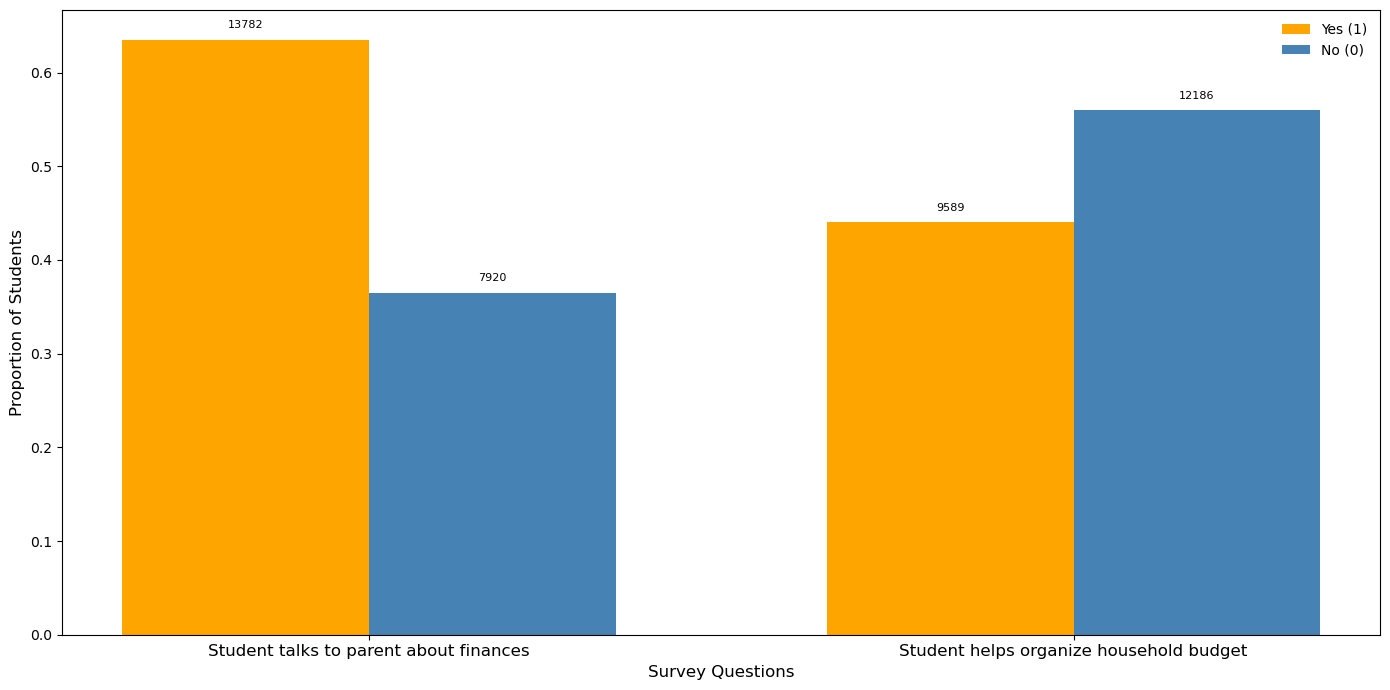

In [127]:
# grouped bar chart for parent financial characteristics 
parent_char = follow_up_1_df[['Parent: Student talks to you about finances (Baseline)', 
'Parent: Student helps organize HH budget (Baseline)' ]]

df = pd.DataFrame(parent_char)

rename_dict = {
    'Parent: Student talks to you about finances (Baseline)': 'Student talks to parent about finances',
    'Parent: Student helps organize HH budget (Baseline)': 'Student helps organize household budget'
}

df = df.rename(columns=rename_dict)


# Calculate proportions for each binary variable
proportions = pd.DataFrame({
    var: df[var].value_counts(normalize=True)
    for var in df.columns
}).fillna(0)

# Sort the index to have 0 and 1 in order
proportions = proportions.T[[0, 1]]

# Calculate the counts of 0s and 1s for each column in `parent_char`
counts = df.apply(pd.Series.value_counts).fillna(0).T

# Create the x-axis labels and positions
x = np.arange(len(counts.index))
width = 0.35  # Width of the bars

# Plot the grouped bar chart
fig, ax = plt.subplots(figsize=(14, 7))
bars1 = ax.bar(x - width/2, proportions[1], width, color='orange', label='Yes (1)')
bars2 = ax.bar(x + width/2, proportions[0], width, color='steelblue', label='No (0)')

# Annotate each bar with the number of observations
for i, col in enumerate(counts.index):
    ax.text(x[i] - width/2, proportions[1][col] + 0.01, f"{int(counts.loc[col, 1])}",
            ha='center', va='bottom', fontsize=8, color='black')
    ax.text(x[i] + width/2, proportions[0][col] + 0.01, f"{int(counts.loc[col, 0])}",
            ha='center', va='bottom', fontsize=8, color='black')

# Add labels, title, and legend
ax.set_xlabel('Survey Questions', fontsize=12)
ax.set_ylabel('Proportion of Students', fontsize=12)
#ax.set_title('Students Engaging in Parental Financial Discussions and Household Budgeting ', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(df.columns, rotation=0, ha='center', fontsize=12)
ax.legend(frameon=False)

plt.tight_layout()
plt.savefig('Students Engaging in Parental Financial Discussions and Household Budgeting .png', dpi=300, bbox_inches='tight')

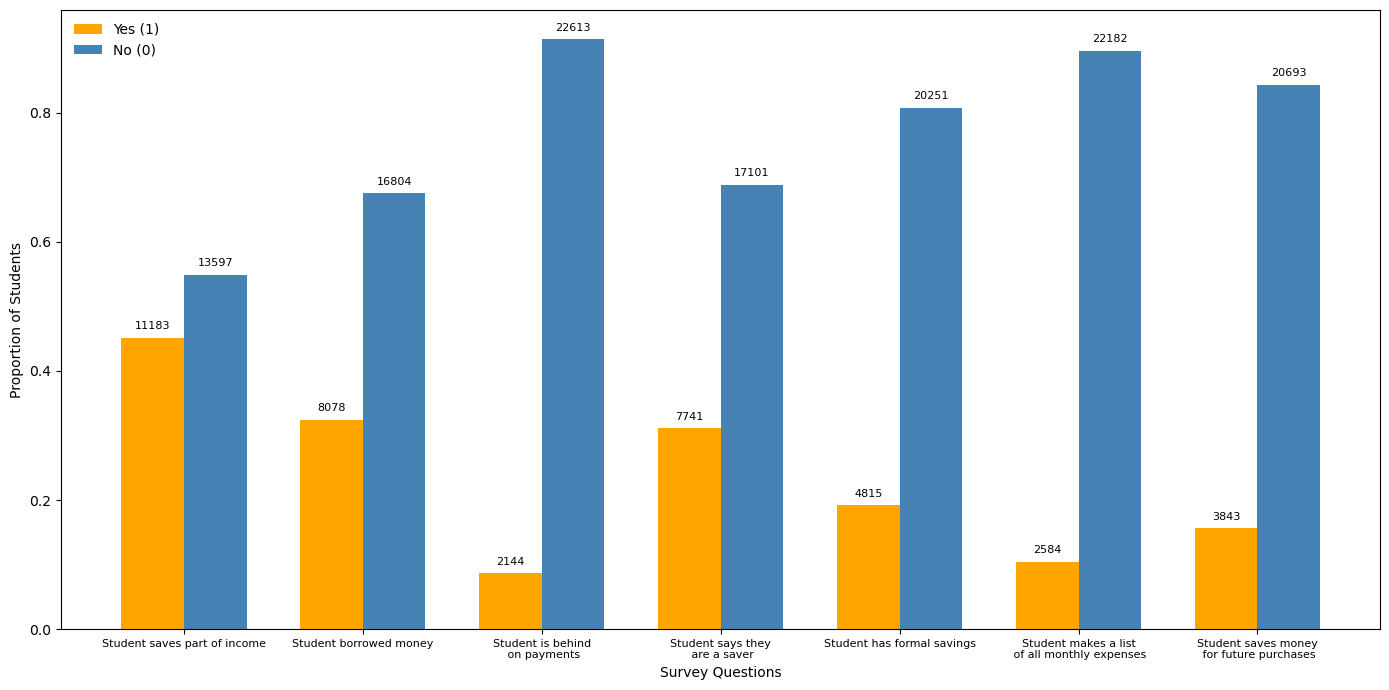

In [117]:
# grouped bar chart for student financial characteristics 
parent_char = follow_up_1_df[['Student part of income saved is non-zero (Baseline)', 
'Student has borrowed money (any source) (Baseline)', 
'Student is behind on payments (unconditional) (Baseline)', 
'Student says they are a saver (Baseline)', 
'Student has formal savings (Baseline)', 
'Student makes a list of all monthly expenses (Baseline)', 
'Student saves money for future purchases (Baseline)',  ]]

df = pd.DataFrame(parent_char)

rename_dict = {
    'Student part of income saved is non-zero (Baseline)': 'Student saves part of income',
    'Student has borrowed money (any source) (Baseline)': 'Student borrowed money',
    'Student is behind on payments (unconditional) (Baseline)': 'Student is behind\n on payments',
    'Student says they are a saver (Baseline)': 'Student says they\n are a saver',
    'Student has formal savings (Baseline)':'Student has formal savings',
    'Student makes a list of all monthly expenses (Baseline)':'Student makes a list\n of all monthly expenses',
    'Student saves money for future purchases (Baseline)':'Student saves money\n for future purchases'
}

df = df.rename(columns=rename_dict)

# Calculate proportions for each binary variable
proportions = pd.DataFrame({
    var: df[var].value_counts(normalize=True)
    for var in df.columns
}).fillna(0)

# Sort the index to have 0 and 1 in order
proportions = proportions.T[[0, 1]]

# Calculate the counts of 0s and 1s for each column in `parent_char`
counts = df.apply(pd.Series.value_counts).fillna(0).T

# Create the x-axis labels and positions
x = np.arange(len(counts.index))
width = 0.35  # Width of the bars

# Plot the grouped bar chart
fig, ax = plt.subplots(figsize=(14, 7))
bars1 = ax.bar(x - width/2, proportions[1], width, color='orange', label='Yes (1)')
bars2 = ax.bar(x + width/2, proportions[0], width, color='steelblue', label='No (0)')

# Annotate each bar with the number of observations
for i, col in enumerate(counts.index):
    ax.text(x[i] - width/2, proportions[1][col] + 0.01, f"{int(counts.loc[col, 1])}",
            ha='center', va='bottom', fontsize=8, color='black')
    ax.text(x[i] + width/2, proportions[0][col] + 0.01, f"{int(counts.loc[col, 0])}",
            ha='center', va='bottom', fontsize=8, color='black')

# Add labels, title, and legend
ax.set_xlabel('Survey Questions', fontsize=10)
ax.set_ylabel('Proportion of Students', fontsize=10)
#ax.set_title('Students\' Financial Behavior (Baseline Survey)', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(df.columns, rotation=0, ha='center', fontsize=8)
ax.legend(frameon=False, loc='upper left')

plt.tight_layout()
plt.savefig('Students Financial Behavior (Baseline Survey).png', dpi=300, bbox_inches='tight')

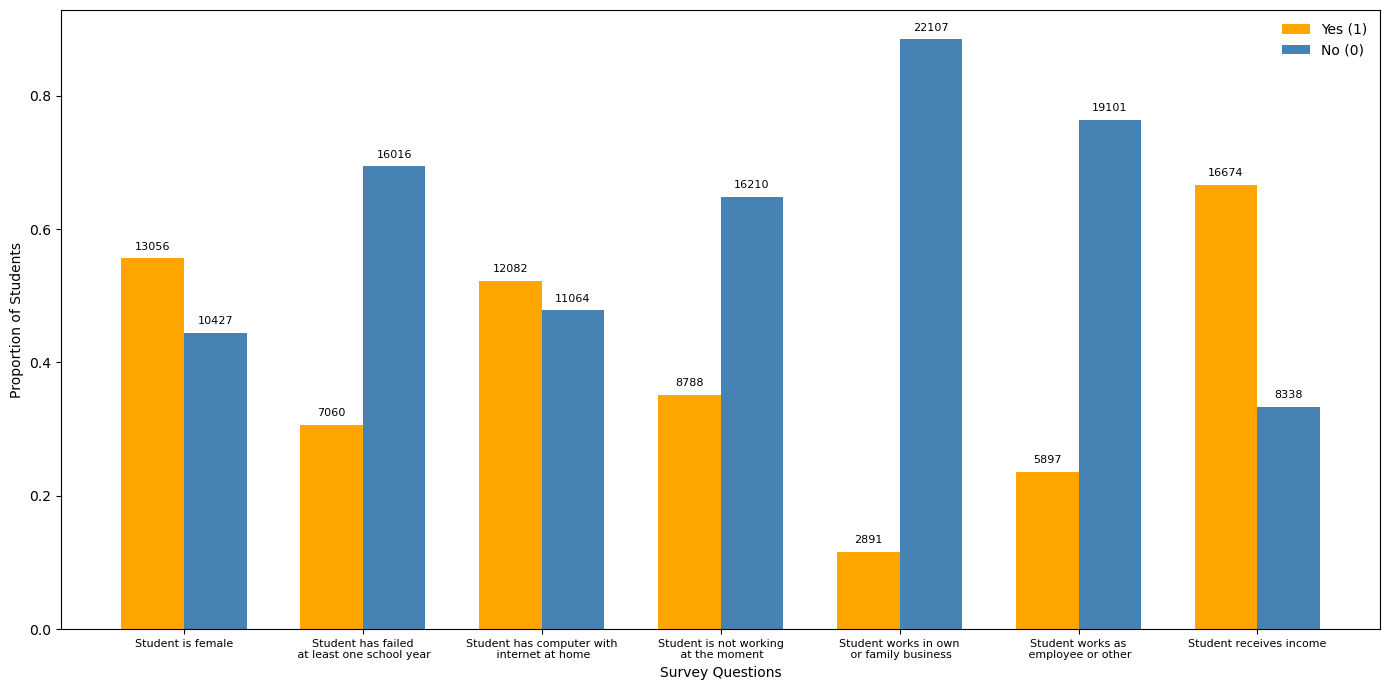

In [110]:
# grouped bar chart for student characteristics 
parent_char = follow_up_1_df[['Student is female (Baseline)', 
'Student has failed at least one school year (Baseline)',
'Student has computer with internet at home (Baseline)', 
'Student is not working at the moment (Baseline)', 
'Student works in own or family business (Baseline)', 
'Student works as employee or other (Baseline)', 
'Student receives income (Baseline)' ]]

df = pd.DataFrame(parent_char)

rename_dict = {
    'Student is female (Baseline)': 'Student is female',
    'Student has failed at least one school year (Baseline)': 'Student has failed\n at least one school year',
    'Student has computer with internet at home (Baseline)': 'Student has computer with\n internet at home',
    'Student is not working at the moment (Baseline)': 'Student is not working\n at the moment',
    'Student works in own or family business (Baseline)':'Student works in own\n or family business',
    'Student works as employee or other (Baseline)':'Student works as\n employee or other',
    'Student receives income (Baseline)':'Student receives income'
}

df = df.rename(columns=rename_dict)


# proportions for each binary variable
proportions = pd.DataFrame({
    var: df[var].value_counts(normalize=True)
    for var in df.columns
}).fillna(0)

proportions = proportions.T[[0, 1]]

# counts of 0s and 1s for each column in `parent_char`
counts = df.apply(pd.Series.value_counts).fillna(0).T

# x-axis labels and positions
x = np.arange(len(counts.index))
width = 0.35  # Width of the bars

# Plot the chart
fig, ax = plt.subplots(figsize=(14, 7))
bars1 = ax.bar(x - width/2, proportions[1], width, color='orange', label='Yes (1)')
bars2 = ax.bar(x + width/2, proportions[0], width, color='steelblue', label='No (0)')

# Annotate bars with the number of observations
for i, col in enumerate(counts.index):
    ax.text(x[i] - width/2, proportions[1][col] + 0.01, f"{int(counts.loc[col, 1])}",
            ha='center', va='bottom', fontsize=8, color='black')
    ax.text(x[i] + width/2, proportions[0][col] + 0.01, f"{int(counts.loc[col, 0])}",
            ha='center', va='bottom', fontsize=8, color='black')

# labels, title, and legend
ax.set_xlabel('Survey Questions', fontsize=10)
ax.set_ylabel('Proportion of Students', fontsize=10)
#ax.set_title('Students\' Characteristics (Baseline Survey)', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(df.columns, rotation=0, ha='center', fontsize=8)
ax.legend(frameon=False)

plt.tight_layout()
plt.savefig('Students Characteristics (Baseline Survey).png', dpi=300, bbox_inches='tight')

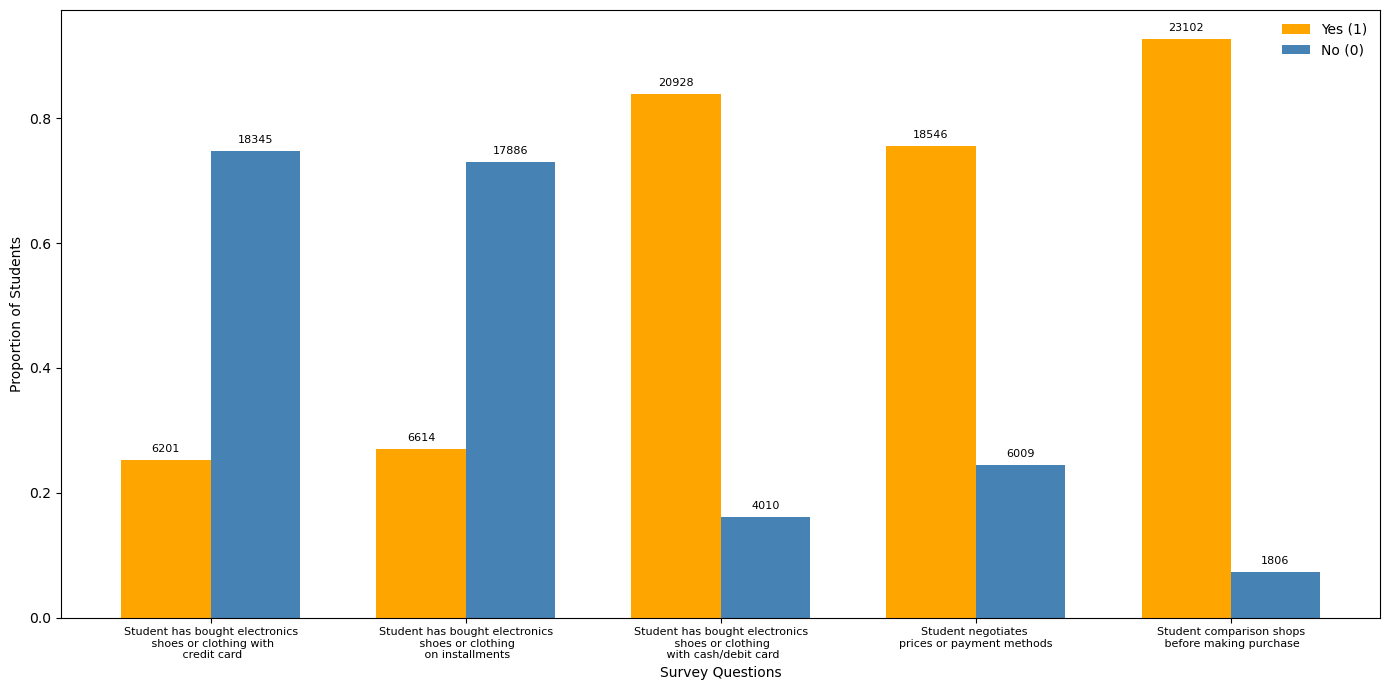

In [125]:
# grouped bar chart for student shopping habits 
parent_char = follow_up_1_df[['Student has bought electronics shoes or clothing with credit card (Baseline)', 
'Student has bought electronics shoes or clothing on installments (Baseline)', 
'Student has bought electronics shoes or clothing with cash/debit card (Baseline)',
'Student negotiates prices or payment methods (Baseline)',
'Student comparison shops before making purchase (Baseline)']]

df = pd.DataFrame(parent_char)

rename_dict = {
    'Student has bought electronics shoes or clothing with credit card (Baseline)': 'Student has bought electronics\n shoes or clothing with\n credit card',
    'Student has bought electronics shoes or clothing on installments (Baseline)': 'Student has bought electronics\n shoes or clothing\n on installments',
    'Student has bought electronics shoes or clothing with cash/debit card (Baseline)': 'Student has bought electronics\n shoes or clothing\n with cash/debit card',
    'Student negotiates prices or payment methods (Baseline)': 'Student negotiates \nprices or payment methods',
    'Student comparison shops before making purchase (Baseline)':'Student comparison shops\n before making purchase'
}

df = df.rename(columns=rename_dict)


# Calculate proportions for each binary variable
proportions = pd.DataFrame({
    var: df[var].value_counts(normalize=True)
    for var in df.columns
}).fillna(0)

# Sort the index to have 0 and 1 in order
proportions = proportions.T[[0, 1]]

# Calculate the counts of 0s and 1s for each column in `parent_char`
counts = df.apply(pd.Series.value_counts).fillna(0).T

# Create the x-axis labels and positions
x = np.arange(len(counts.index))
width = 0.35  # Width of the bars

# Plot the grouped bar chart
fig, ax = plt.subplots(figsize=(14, 7))
bars1 = ax.bar(x - width/2, proportions[1], width, color='orange', label='Yes (1)')
bars2 = ax.bar(x + width/2, proportions[0], width, color='steelblue', label='No (0)')

# Annotate each bar with the number of observations
for i, col in enumerate(counts.index):
    ax.text(x[i] - width/2, proportions[1][col] + 0.01, f"{int(counts.loc[col, 1])}",
            ha='center', va='bottom', fontsize=8, color='black')
    ax.text(x[i] + width/2, proportions[0][col] + 0.01, f"{int(counts.loc[col, 0])}",
            ha='center', va='bottom', fontsize=8, color='black')

# Add labels, title, and legend
ax.set_xlabel('Survey Questions', fontsize=10)
ax.set_ylabel('Proportion of Students', fontsize=10)
#ax.set_title('Student Spending Habits', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(df.columns, rotation=0, ha='center', fontsize=8)
ax.legend(frameon=False)

plt.tight_layout()
plt.savefig('Student Spending Habits.png', dpi=300, bbox_inches='tight')